# IMPORTING PYTHON PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# IMPORTING DATASET

In [2]:
df_fraud=pd.read_csv('automobile_insurance_fraud.csv')
df_fraud

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
0         466132  ...         2                     YES              71610   
1         468176  ...         0                     NaN               5070   
2         430632  ...         3                      NO              34650   
3         608117  ...         2                      NO              63400   
4         610706  ...         1                      NO               6500   
..           ...  ...       ...                     ...                ...   
995       431289  ...         1                     NaN              87200   
996       608177  ...         3                     NaN             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                     NaN               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
0           6510          13020          52080        Saab        92x   
1            780            780           3510    Mercedes       E400   
2           7700           3850          23100       Dodge        RAM   
3           6340           6340          50720   Chevrolet      Tahoe   
4           1300            650           4550      Accura        RSX   
..           ...            ...            ...         ...        ...   
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
4        2009              N  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      200

In [3]:
df_fraud.drop(df_fraud.columns[[2,3,8,17,24]],axis=1,inplace=True)
df_fraud.isnull().sum()

months_as_customer               0
age                              0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim      

IMPUTER

In [4]:
imp=SimpleImputer(strategy="most_frequent")
df_fraud['collision_type']=imp.fit_transform(df_fraud['collision_type'].values.reshape(-1,1))
df_fraud[['property_damage', 'police_report_available']] = df_fraud[['property_damage', 'police_report_available']].fillna(value='NO')
df_fraud

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   328   48           OH    250/500               1000   
1                   228   42           IN    250/500               2000   
2                   134   29           OH    100/300               2000   
3                   256   41           IL    250/500               2000   
4                   228   44           IL   500/1000               1000   
..                  ...  ...          ...        ...                ...   
995                   3   38           OH   500/1000               1000   
996                 285   41           IL    100/300               1000   
997                 130   34           OH    250/500                500   
998                 458   62           IL   500/1000               2000   
999                 456   60           OH    250/500               1000   

     policy_annual_premium  insured_zip insured_sex insured_education_level  \
0                  1406.91       466132        MALE                      MD   
1                  1197.22       468176        MALE                      MD   
2                  1413.14       430632      FEMALE                     PhD   
3                  1415.74       608117      FEMALE                     PhD   
4                  1583.91       610706        MALE               Associate   
..                     ...          ...         ...                     ...   
995                1310.80       431289      FEMALE                 Masters   
996                1436.79       608177      FEMALE                     PhD   
997                1383.49       442797      FEMALE                 Masters   
998                1356.92       441714        MALE               Associate   
999                 766.19       612260      FEMALE               Associate   

    insured_occupation  ... witnesses police_report_available  \
0         craft-repair  ...         2                     YES   
1    machine-op-inspct  ...         0                      NO   
2                sales  ...         3                      NO   
3         armed-forces  ...         2                      NO   
4                sales  ...         1                      NO   
..                 ...  ...       ...                     ...   
995       craft-repair  ...         1                      NO   
996     prof-specialty  ...         3                      NO   
997       armed-forces  ...         3                     YES   
998  handlers-cleaners  ...         1                     YES   
999              sales  ...         3                      NO   

     total_claim_amount  injury_claim property_claim vehicle_claim  \
0                 71610          6510          13020         52080   
1                  5070           780            780          3510   
2                 34650          7700           3850         23100   
3                 63400          6340           6340         50720   
4                  6500          1300            650          4550   
..                  ...           ...            ...           ...   
995               87200         17440           8720         61040   
996              108480         18080          18080         72320   
997               67500          7500           7500         52500   
998               46980          5220           5220         36540   
999                5060           460            920          3680   

      auto_make auto_model auto_year fraud_reported  
0          Saab        92x      2004              Y  
1      Mercedes       E400      2007              Y  
2         Dodge        RAM      2007              N  
3     Chevrolet      Tahoe      2014              Y  
4        Accura        RSX      2009              N  
..          ...        ...       ...            ...  
995       Honda     Accord      2006              N  
996  Volkswagen     Passat      2015              N  
997      Suburu    Impreza      1996           

# EXPLORATORY DATA ANALYSIS 

In [5]:
df_fraud.head()

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   
2                 134   29           OH    100/300               2000   
3                 256   41           IL    250/500               2000   
4                 228   44           IL   500/1000               1000   

   policy_annual_premium  insured_zip insured_sex insured_education_level  \
0                1406.91       466132        MALE                      MD   
1                1197.22       468176        MALE                      MD   
2                1413.14       430632      FEMALE                     PhD   
3                1415.74       608117      FEMALE                     PhD   
4                1583.91       610706        MALE               Associate   

  insured_occupation  ... witnesses police_report_available  \
0       craft-repair  ...         2                     YES   
1  machine-op-inspct  ...         0                      NO   
2              sales  ...         3                      NO   
3       armed-forces  ...         2                      NO   
4              sales  ...         1                      NO   

   total_claim_amount  injury_claim property_claim vehicle_claim  auto_make  \
0               71610          6510          13020         52080       Saab   
1                5070           780            780          3510   Mercedes   
2               34650          7700           3850         23100      Dodge   
3               63400          6340           6340         50720  Chevrolet   
4                6500          1300            650          4550     Accura   

  auto_model auto_year fraud_reported  
0        92x      2004              Y  
1       E400      2007              Y  
2        RAM      2007              N  
3      Tahoe      2014              Y  
4        RSX      2009              N  

[5 rows x 34 columns]

In [6]:
df_fraud.tail()

months_as_customer  age policy_state policy_csl  policy_deductable  \
995                   3   38           OH   500/1000               1000   
996                 285   41           IL    100/300               1000   
997                 130   34           OH    250/500                500   
998                 458   62           IL   500/1000               2000   
999                 456   60           OH    250/500               1000   

     policy_annual_premium  insured_zip insured_sex insured_education_level  \
995                1310.80       431289      FEMALE                 Masters   
996                1436.79       608177      FEMALE                     PhD   
997                1383.49       442797      FEMALE                 Masters   
998                1356.92       441714        MALE               Associate   
999                 766.19       612260      FEMALE               Associate   

    insured_occupation  ... witnesses police_report_available  \
995       craft-repair  ...         1                      NO   
996     prof-specialty  ...         3                      NO   
997       armed-forces  ...         3                     YES   
998  handlers-cleaners  ...         1                     YES   
999              sales  ...         3                      NO   

     total_claim_amount  injury_claim property_claim vehicle_claim  \
995               87200         17440           8720         61040   
996              108480         18080          18080         72320   
997               67500          7500           7500         52500   
998               46980          5220           5220         36540   
999                5060           460            920          3680   

      auto_make auto_model auto_year fraud_reported  
995       Honda     Accord      2006              N  
996  Volkswagen     Passat      2015              N  
997      Suburu    Impreza      1996              N  
998        Audi         A5      1998              N  
999    Mercedes       E400      2007              N  

[5 rows x 34 columns]

In [7]:
df_fraud.shape

(1000, 34)

In [8]:
df_fraud.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available  

LABEL ENCODING

In [9]:
le=LabelEncoder()
list=['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','property_damage','police_report_available','auto_make','auto_model','fraud_reported']
for val in list:
    df_fraud[val]=le.fit_transform(df_fraud[val].astype(str))
df_fraud

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                   328   48             2           1               1000   
1                   228   42             1           1               2000   
2                   134   29             2           0               2000   
3                   256   41             0           1               2000   
4                   228   44             0           2               1000   
..                  ...  ...           ...         ...                ...   
995                   3   38             2           2               1000   
996                 285   41             0           0               1000   
997                 130   34             2           1                500   
998                 458   62             0           2               2000   
999                 456   60             2           1               1000   

     policy_annual_premium  insured_zip  insured_sex  insured_education_level  \
0                  1406.91       466132            1                        4   
1                  1197.22       468176            1                        4   
2                  1413.14       430632            0                        6   
3                  1415.74       608117            0                        6   
4                  1583.91       610706            1                        0   
..                     ...          ...          ...                      ...   
995                1310.80       431289            0                        5   
996                1436.79       608177            0                        6   
997                1383.49       442797            0                        5   
998                1356.92       441714            1                        0   
999                 766.19       612260            0                        0   

     insured_occupation  ...  witnesses  police_report_available  \
0                     2  ...          2                        1   
1                     6  ...          0                        0   
2                    11  ...          3                        0   
3                     1  ...          2                        0   
4                    11  ...          1                        0   
..                  ...  ...        ...                      ...   
995                   2  ...          1                        0   
996                   9  ...          3                        0   
997                   1  ...          3                        1   
998                   5  ...          1                        1   
999                  11  ...          3                        0   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0                 71610          6510           13020          52080   
1                  5070           780             780           3510   
2                 34650          7700            3850          23100   
3                 63400          6340            6340          50720   
4                  6500          1300             650           4550   
..                  ...           ...             ...            ...   
995               87200         17440            8720          61040   
996              108480         18080           18080          72320   
997               67500          7500            7500          52500   
998               46980          5220            5220          36540   
999                5060           460             920           3680   

     auto_make  auto_model  auto_year  fraud_reported  
0           10           1       2004               1  
1            8          12       2007               1  
2            4          30       2007               0  
3            3          34       2014               1  
4            0          31       2009               0  
..         ...         ...        ...             ...  
995          6           6       

In [10]:
df_fraud.dtypes

months_as_customer               int64
age                              int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                        int64
police_report_available  

In [11]:
df_fraud.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [12]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_state                   1000 non-null int32
policy_csl                     1000 non-null int32
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null int32
insured_education_level        1000 non-null int32
insured_occupation             1000 non-null int32
insured_hobbies                1000 non-null int32
insured_relationship           1000 non-null int32
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_type                  1000 non-null int32
collision_type                 1000 non-null int32
incident_severity              1000 non-null int32
authorities_contacted    

In [13]:
df_fraud.describe()

months_as_customer          age  policy_state   policy_csl  \
count         1000.000000  1000.000000    1000.00000  1000.000000   
mean           203.954000    38.948000       1.01400     0.951000   
std            115.113174     9.140287       0.83096     0.804516   
min              0.000000    19.000000       0.00000     0.000000   
25%            115.750000    32.000000       0.00000     0.000000   
50%            199.500000    38.000000       1.00000     1.000000   
75%            276.250000    44.000000       2.00000     2.000000   
max            479.000000    64.000000       2.00000     2.000000   

       policy_deductable  policy_annual_premium    insured_zip  insured_sex  \
count        1000.000000            1000.000000    1000.000000  1000.000000   
mean         1136.000000            1256.406150  501214.488000     0.463000   
std           611.864673             244.167395   71701.610941     0.498879   
min           500.000000             433.330000  430104.000000     0.000000   
25%           500.000000            1089.607500  448404.500000     0.000000   
50%          1000.000000            1257.200000  466445.500000     0.000000   
75%          2000.000000            1415.695000  603251.000000     1.000000   
max          2000.000000            2047.590000  620962.000000     1.000000   

       insured_education_level  insured_occupation  ...    witnesses  \
count              1000.000000         1000.000000  ...  1000.000000   
mean                  2.966000            6.653000  ...     1.487000   
std                   1.948497            4.019048  ...     1.111335   
min                   0.000000            0.000000  ...     0.000000   
25%                   1.000000            3.000000  ...     1.000000   
50%                   3.000000            7.000000  ...     1.000000   
75%                   5.000000           10.000000  ...     2.000000   
max                   6.000000           13.000000  ...     3.000000   

       police_report_available  total_claim_amount  injury_claim  \
count              1000.000000          1000.00000   1000.000000   
mean                  0.314000         52761.94000   7433.420000   
std                   0.464349         26401.53319   4880.951853   
min                   0.000000           100.00000      0.000000   
25%                   0.000000         41812.50000   4295.000000   
50%                   0.000000         58055.00000   6775.000000   
75%                   1.000000         70592.50000  11305.000000   
max                   1.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_make   auto_model    auto_year  \
count     1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean      7399.570000   37928.950000     6.546000    19.318000  2005.103000   
std       4824.726179   18886.252893     4.034869    11.136107     6.015861   
min          0.000000      70.000000     0.000000     0.000000  1995.000000   
25%       4445.000000   30292.500000     3.000000    10.000000  2000.000000   
50%       6750.000000   42100.000000     7.000000    20.000000  2005.000000   
75%      10885.000000   50822.500000    10.000000    29.000000  2010.000000   
max      23670.000000   79560.000000    13.000000    38.000000  2015.000000   

       fraud_reported  
count     1000.000000  
mean         0.247000  
std          0.431483  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000  

[8 rows x 34 columns]

Data in the column 'charges' does not appear to have normal distribution. Data in all other columns appear to have normal distribution (mean very close to 50th percentile).

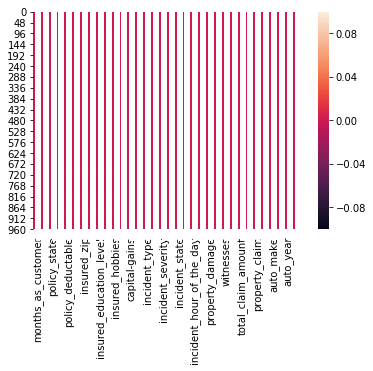

In [14]:
sns.heatmap(df_fraud.isnull(),annot=True)

In [15]:
df_fraud.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make 

CHECKING DATA SKEWNESS

In [16]:
df_fraud.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                   0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636


REMOVING DATA SKEWNESS

In [17]:
for col in df_fraud.columns:
    if df_fraud.skew().loc[col]>0.55:
        df_fraud[col]=np.log1p(df_fraud[col])
df_fraud.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
insured_zip                    0.782405
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                   0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636


CHECKING OUTLIERS

In [18]:
z=np.abs(zscore(df_fraud))
print(z.shape)
print(np.where(z>3))

(1000, 34)
(array([229, 248, 500, 763, 807], dtype=int64), array([ 5,  5, 28,  5, 13], dtype=int64))


REMOVING OUTLIERS

In [19]:
print(df_fraud.iloc[229,])
print()
print(df_fraud.iloc[248,])
print()
print(df_fraud.iloc[500,])
print()
print(df_fraud.iloc[763,])
print()
print(df_fraud.iloc[807,])

months_as_customer               154.00000
age                               37.00000
policy_state                       0.00000
policy_csl                         1.00000
policy_deductable               1000.00000
policy_annual_premium           2047.59000
insured_zip                       12.99287
insured_sex                        0.00000
insured_education_level            4.00000
insured_occupation                 4.00000
insured_hobbies                    7.00000
insured_relationship               2.00000
capital-gains                      0.00000
capital-loss                   67800.00000
incident_type                      2.00000
collision_type                     1.00000
incident_severity                  1.00000
authorities_contacted              3.00000
incident_state                     4.00000
incident_city                      1.00000
incident_hour_of_the_day           2.00000
number_of_vehicles_involved        1.00000
property_damage                    0.00000
bodily_inju

In [20]:
df_fraud.drop([229,248,500,763,807],inplace=True)
df_final=df_fraud

BOXPLOT

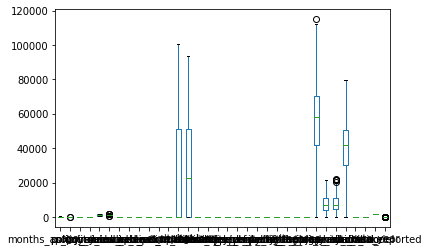

In [21]:
df_final.plot.box()

CORRELATION

In [22]:
df_final.corr()

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922092      0.000115   
age                                    0.922092  1.000000     -0.015184   
policy_state                           0.000115 -0.015184      1.000000   
policy_csl                            -0.022954 -0.012423     -0.000347   
policy_deductable                      0.023763  0.026951      0.010776   
policy_annual_premium                 -0.003318  0.005931      0.014483   
insured_zip                            0.023935  0.030237      0.008391   
insured_sex                            0.058878  0.072832     -0.019320   
insured_education_level               -0.000845  0.001487     -0.032551   
insured_occupation                     0.005500  0.014124     -0.031011   
insured_hobbies                       -0.092665 -0.080649     -0.040229   
insured_relationship                   0.071282  0.076077     -0.018846   
capital-gains                          0.007940 -0.006129      0.072735   
capital-loss                          -0.020379 -0.007904      0.032470   
incident_type                         -0.017387 -0.026111      0.031768   
collision_type                        -0.072485 -0.075896      0.050953   
incident_severity                     -0.061966 -0.060384     -0.026732   
authorities_contacted                  0.011190  0.015864     -0.017782   
incident_state                         0.006742  0.006945      0.009181   
incident_city                         -0.001600 -0.003853     -0.004452   
incident_hour_of_the_day               0.068797  0.085445      0.026468   
number_of_vehicles_involved            0.013802  0.021277     -0.043454   
property_damage                        0.002557 -0.005868     -0.009348   
bodily_injuries                       -0.010936 -0.017341      0.009021   
witnesses                              0.063811  0.056859      0.024857   
police_report_available               -0.018874 -0.018570      0.065959   
total_claim_amount                     0.064344  0.070098     -0.008486   
injury_claim                           0.066612  0.075626     -0.046403   
property_claim                         0.041345  0.064375      0.002698   
vehicle_claim                          0.062170  0.062025     -0.000549   
auto_make                              0.049048  0.031987      0.015838   
auto_model                             0.002689  0.016125     -0.024562   
auto_year                              0.001017  0.003092      0.002296   
fraud_reported                         0.020878  0.012348      0.028858   

                             policy_csl  policy_deductable  \
months_as_customer            -0.022954           0.023763   
age                           -0.012423           0.026951   
policy_state                  -0.000347           0.010776   
policy_csl                     1.000000           0.006065   
policy_deductable              0.006065           1.000000   
policy_annual_premium          0.030842          -0.008983   
insured_zip                    0.002845           0.008154   
insured_sex                   -0.008313          -0.010368   
insured_education_level        0.010379           0.014560   
insured_occupation             0.019551          -0.051268   
insured_hobbies               -0.007415           0.005820   
insured_relationship          -0.031888          -0.023132   
capital-gains                  0.004114           0.033218   
capital-loss                   0.034360           0.019874   
incident_type                  0.012487          -0.037222   
collision_type                 0.020801          -0.054164   
incident_severity              0.024536          -0.017089   
authorities_contacted          0.055893           0.001795   
incident_state                 0.031995           0.008901   
incident_city                  0.010614          -0.048761   
incident_hour_of_the_day      -0.000460           0.062042   
number_of_vehicles_involved   -0.019864

PAIRPLOT

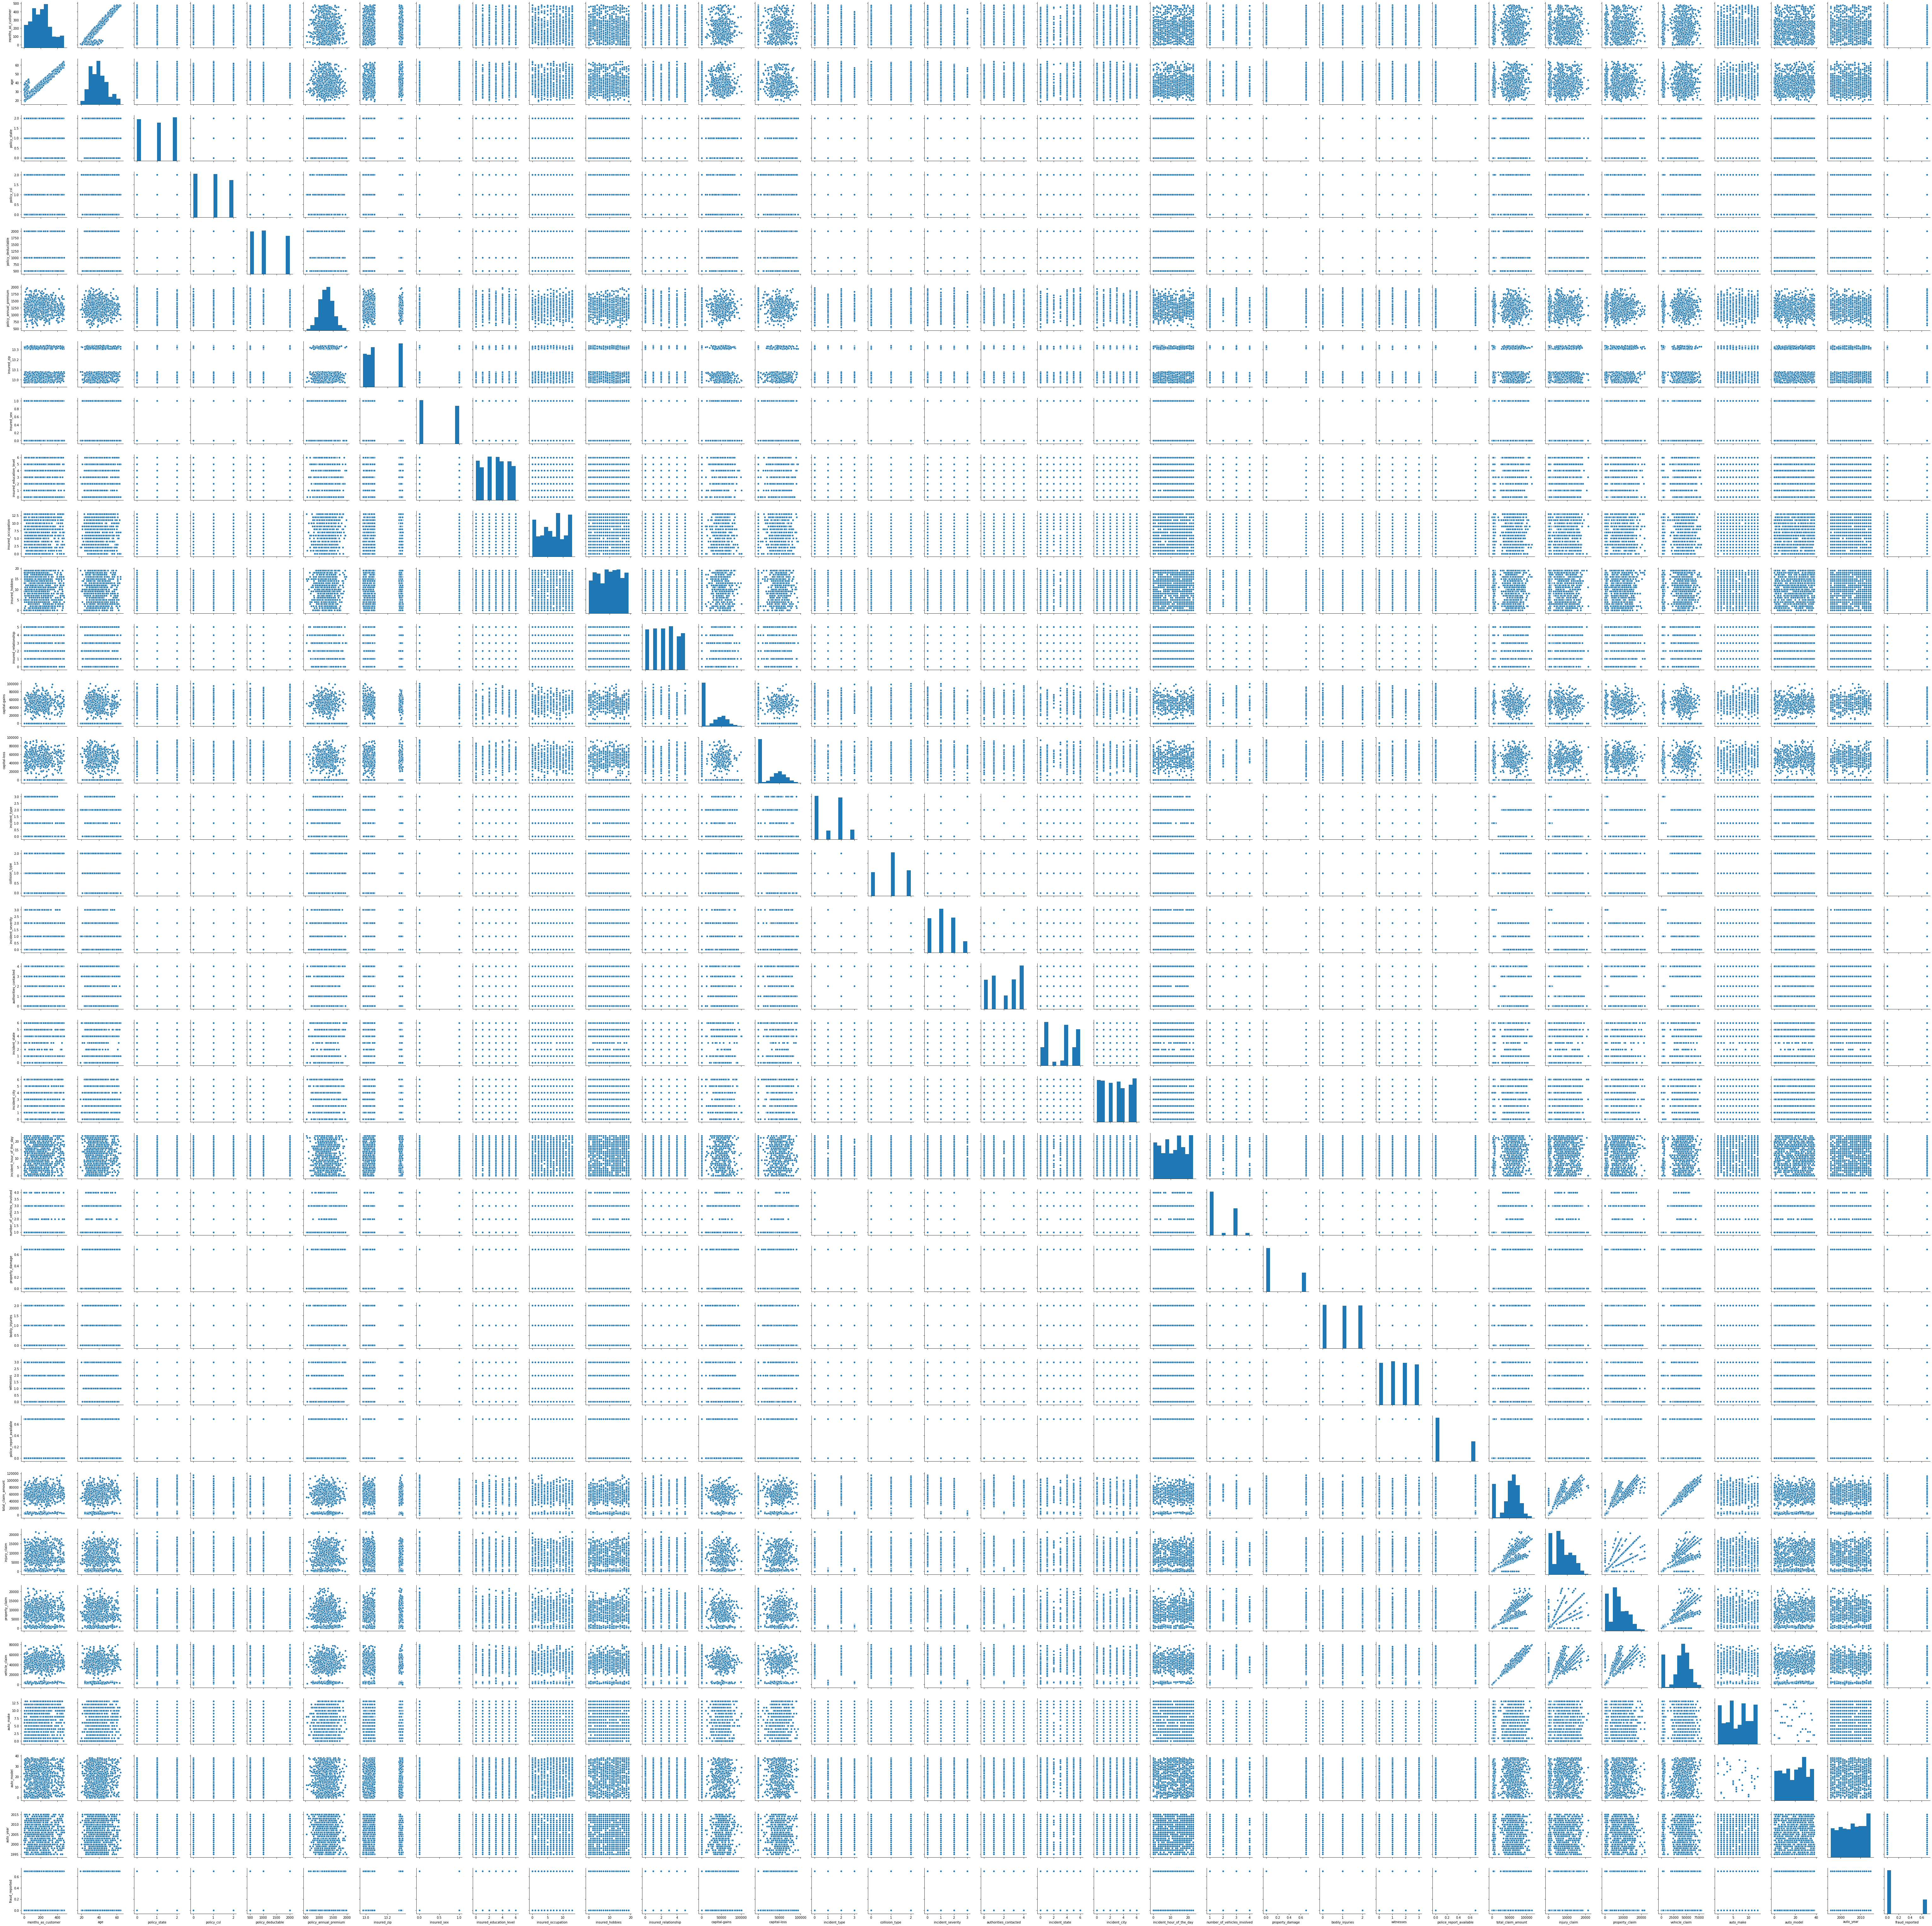

In [23]:
sns.pairplot(df_final)

# TRAIN AND TEST DATA

In [24]:
df_x=df_final.iloc[:,:-1]
print(df_x)
y=df_final.iloc[:,-1]
print(y)
print()
print(df_x.shape)
print(y.shape)

     months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                   328   48             2           1               1000   
1                   228   42             1           1               2000   
2                   134   29             2           0               2000   
3                   256   41             0           1               2000   
4                   228   44             0           2               1000   
..                  ...  ...           ...         ...                ...   
995                   3   38             2           2               1000   
996                 285   41             0           0               1000   
997                 130   34             2           1                500   
998                 458   62             0           2               2000   
999                 456   60             2           1               1000   

     policy_annual_premium  insured_zip  insured_sex  insured_education_lev

In [25]:
x=df_x

# TRAINING AND TESTING - VARIOUS MODELS

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=10,stratify=y)

In [27]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(696, 33) (299, 33)
(696,) (299,)


CLASSIFIERS

In [28]:
knn=KNeighborsClassifier(n_neighbors=10)
dtc=DecisionTreeClassifier(random_state=10)
gnb=GaussianNB()
rfc=RandomForestClassifier()

In [29]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('DecisionTreeClassifier',dtc))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))

FUNCTION DECLARATION

************* KNeighborsClassifier *************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')


Accuracy Score =  1.0


cross_val_score =  1.0


classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       299

    accuracy                           1.00       299
   macro avg       1.00      1.00      1.00       299
weighted avg       1.00      1.00      1.00       299



[[299]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************* DecisionTreeClassifier *************


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       mi

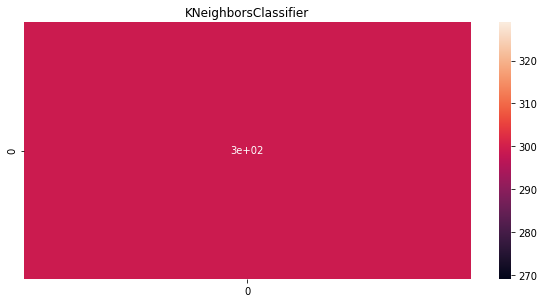

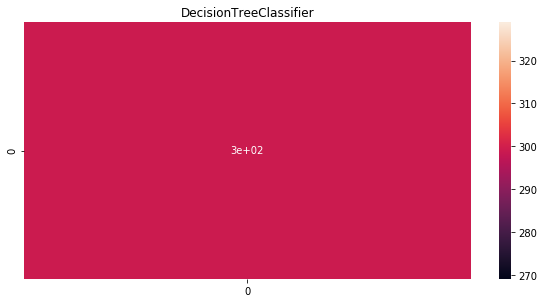

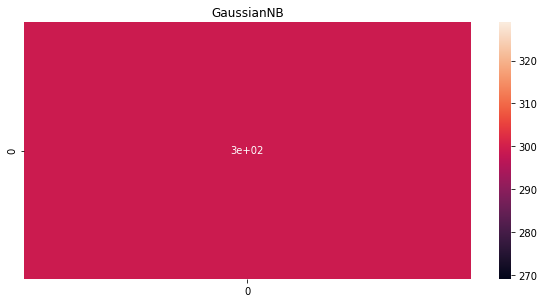

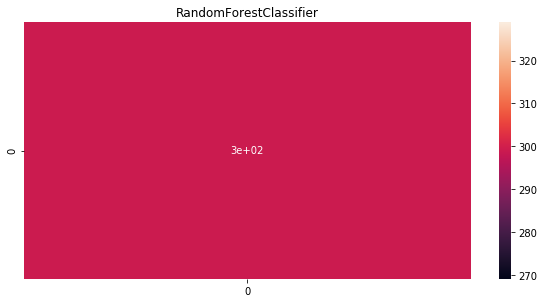

In [30]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('*************',name,'*************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train.astype(int))
    print(model)
    y_pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test.astype(int),y_pred.astype(int))
    print('Accuracy Score = ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y.astype(int),cv=10,scoring='accuracy').mean()
    print('cross_val_score = ',sc)
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test.astype(int),y_pred.astype(int)))
    print('\n')
    cm=confusion_matrix(y_test.astype(int),y_pred.astype(int))
    print(cm)
    print('\n')
    plt.figure(figsize=(10,50))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    print('\n\n')

# BEST MODEL

In [31]:
result=pd.DataFrame({'Model ':Model,'Accuracy Score ':score,'Cross_Val_Score':cvs})
result

Model   Accuracy Score   Cross_Val_Score
0    KNeighborsClassifier            100.0            100.0
1  DecisionTreeClassifier            100.0            100.0
2              GaussianNB            100.0            100.0
3  RandomForestClassifier            100.0            100.0

I choose KNeighbors Classifier for this dataset. 

# PICKLE

In [32]:
joblib.dump(knn,"fraud.pkl")

['fraud.pkl']